## Univariate Linear Regression on the California Housing Prices Dataset

In this problem statement, we aim to determine how various variables affect house prices in California. The variables in our case represent different characteristics of a house, such as median house value, number of households, and median income of the person purchasing the house. We analyze a set of data, clean it up, and then apply a simple mathematical method called linear regression to make predictions. The goal is to comprehend how changes in one specific factor influence house prices.

We will use a free dataset available on Kaggle.com named: [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

### Importing packages and dataset

> We will import dataset using pd.read_csv(filepath) method to load dataset into a dataframe and then display first 5 values of dataframe using df.head() method

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [2]:
df = pd.read_csv('./housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


We will now use df.decribe() method to get insights of our dataframe such has mean, median and distibution of values among other things. THis brief description will give us an idea if there are any missing values (By checking if count is same for each column) or there are outliers i.e data points that goes far outside the average value of samples.

> NOTE: df.decribe() method only works on column values that are numeric i.e. int, float, etc

In [3]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

> In above step we have checked number of checked values that are missing for the given dataset.

It's a good practive to handle missing values by either deleting rows with missing values or adding random values in those cells based on various algorithms such as Forward fill, Backwards fill, interpolation, etc to improve accuracy of model.

For example, in the given problem we can just delete the rows with missing values using "df.dropna(inplace= True)" as the are insignificant compared to overall data. 207/20640

Since in our current problem statement we are not focusing on 'total_bedrooms' column we will ignore this for now and get back to it later someday.

#### In this problem statement we will focus in 3 independent variables and one dependent variable.

- Independent Variables
    - median_income
    - population
    - households
- Dependent Variable
    - median_house_value


#### Let's go through each variables one by one.

First independent variable column is 'median_income'  that gives median income for households within a block of houses (measured in tens of thousands of US Dollars)

In [5]:
df['median_income'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

We can see  that we have 20640 samples having mean income of \\$38,706.71 with lowest being \\$4999 and highest being \\$150001

Second independent variable column is 'population' that represents total number of people residing within a block.

In [6]:
df['population'].describe()

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: population, dtype: float64

We can see that we have 20640 samples having mean population of 1425.476744 with lowest being 3 and highest being 35682

Third independent variable column is 'households' that represents total number of households, a group of people residing within a home unit, for a block

In [7]:
df['households'].describe()

count    20640.000000
mean       499.539680
std        382.329753
min          1.000000
25%        280.000000
50%        409.000000
75%        605.000000
max       6082.000000
Name: households, dtype: float64

We can see that we have 20640 samples having mean households of 499.539680 with lowest being 1 and highest being 6082

At last, we have 'median_house_value' that contains median house value for households within a block (measured in US Dollars)

In [8]:
df['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

We can see that we have 20640 samples having mean value of 206855.816909 with lowest being 14999 and highest being 500001

> After going through all four variables, there are no immediate signs of any outliers present, but that does not rule out the possibility of that. For that, we have to use visualization tools such as Seaborn and Matplotlib.

#### We will now create charts for meadian house price in relation to all 3 independent variables individually.

[Text(0.5, 1.0, 'Median Income vs Median House Value')]

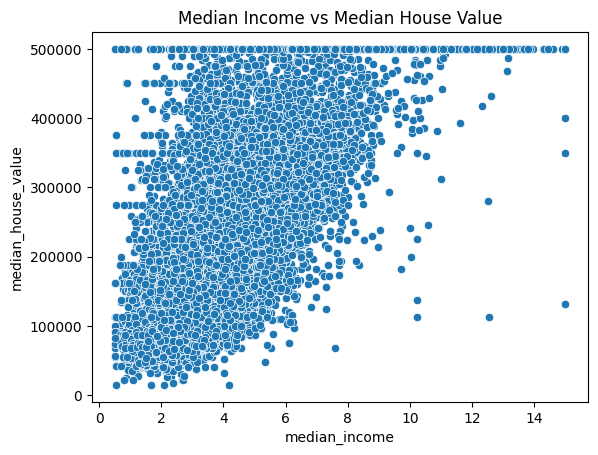

In [9]:
sns.scatterplot(data=df, x="median_income", y="median_house_value").set(title = 'Median Income vs Median House Value')

[Text(0.5, 1.0, 'Population vs Median House Value')]

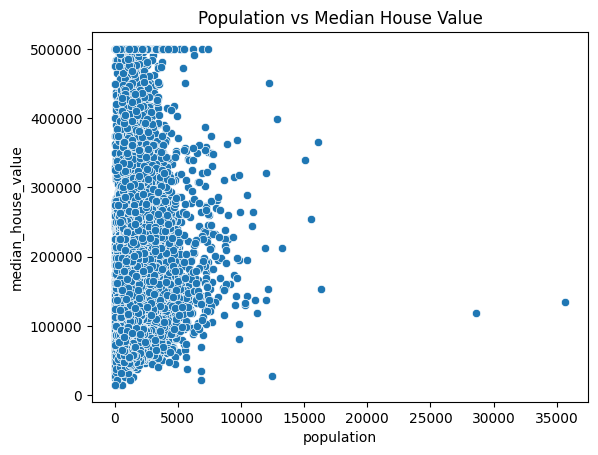

In [10]:
sns.scatterplot(data=df, x="population", y="median_house_value").set(title = 'Population vs Median House Value')

[Text(0.5, 1.0, 'Households vs Median House Value')]

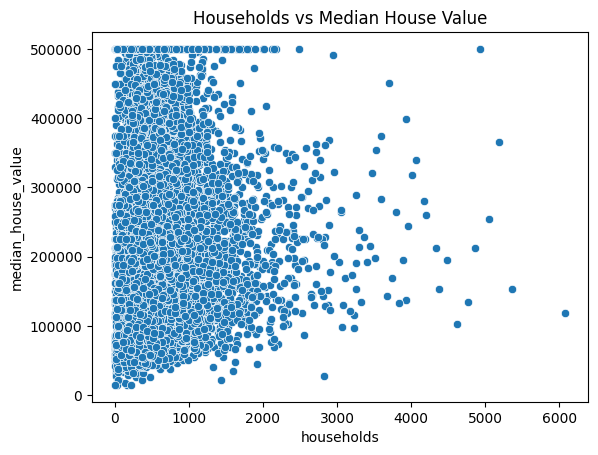

In [11]:
sns.scatterplot(data=df, x="households", y="median_house_value").set(title = 'Households vs Median House Value')

> After observing the above mentioned scatter plots, we can observe that median house prices of houses are not affected by population of location or household meaning houses at every budget can be found regardless of population or households. But when we comapare the same with median income a different pattern can be seen. As median income increases the house price also increases meaning the richer you get the better house you want to live in.

> There are few exception to what we described above. There are some points in graph that does not follow the usual pattern and are a lot higher than other simmilar values. These are called outliers and can skew predictions of our model. Ideally, we must remove those outliers to improve accuracy of our model. But for context for this problem statement we will ignore minor accuracy loss.

## Linear Regression

In [12]:
# Creating a summry dataframe to store details about linear regression model
summary_table = pd.DataFrame(columns = [
    "Model", 
    "Dependent Variable", 
    "Independent Variable", 
    "Intercept", 
    "Coefficient", 
    "R2 Score", 
    "Mean Absolute Error", 
    "Mean Squared Error"
])

### Linear Regression Model for comparision between Median Income and Median House Price

In [13]:
X = df[['median_income']]
Y = df['median_house_value']
income_v_price_model = LinearRegression()
income_v_price_model.fit(X, Y)
income_v_price_predicted = income_v_price_model.predict(X)

income_v_price_mse = mse(Y, income_v_price_predicted)
income_v_price_mae = mae(Y, income_v_price_predicted)

summary_table.loc[len(summary_table.index)] = [
    "income_v_price_model",
    "median_income",
    "median_house_value",
    income_v_price_model.intercept_,
    income_v_price_model.coef_,
    income_v_price_model.score(X, Y),
    income_v_price_mae,
    income_v_price_mse
]

### Linear Regression Model for comparision between Population and Median House Price

In [14]:
X = df[['population']]
Y = df['median_house_value']
population_v_price_model = LinearRegression()
population_v_price_model.fit(X, Y)
population_v_price_predicted = population_v_price_model.predict(X)

population_v_price_mse = mse(Y, population_v_price_predicted)
population_v_price_mae = mae(Y, population_v_price_predicted)

summary_table.loc[len(summary_table.index)] = [
    "population_v_price_model",
    "population",
    "median_house_value",
    population_v_price_model.intercept_,
    population_v_price_model.coef_,
    population_v_price_model.score(X, Y),
    population_v_price_mae,
    population_v_price_mse
]

### Linear Regression Model for comparision between Households and Median House Price

In [15]:
X = df[['households']]
Y = df['median_house_value']
household_v_price_model = LinearRegression()
household_v_price_model.fit(X, Y)
household_v_price_predicted = household_v_price_model.predict(X)

household_v_price_mse = mse(Y, household_v_price_predicted)
household_v_price_mae = mae(Y, household_v_price_predicted)

summary_table.loc[len(summary_table.index)] = [
    "household_v_price_model",
    "households",
    "median_house_value",
    household_v_price_model.intercept_,
    household_v_price_model.coef_,
    household_v_price_model.score(X, Y),
    household_v_price_mae,
    household_v_price_mse
]

### Graph for Actual and Predicted values for Median House Price given Median Income

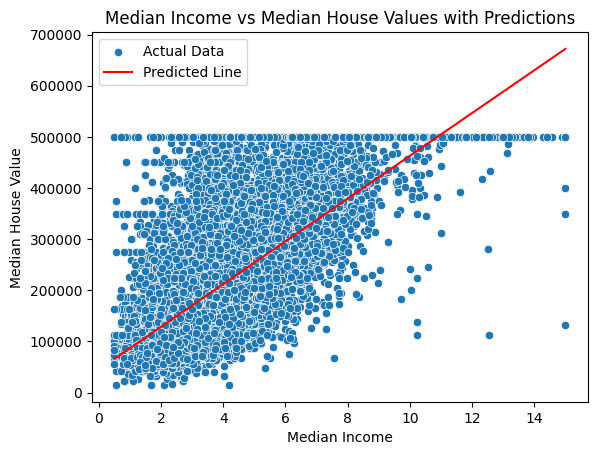

In [16]:
income_price_graph_df = pd.DataFrame({"Income": df['median_income'], "Actual Price": df['median_house_value'], "Predicted Price": income_v_price_predicted})
sns.scatterplot(x='Income', y='Actual Price', data=income_price_graph_df, label='Actual Data')
sns.lineplot(x='Income', y='Predicted Price', data=income_price_graph_df, color='red', label='Predicted Line')

plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Median Income vs Median House Values with Predictions')

plt.legend()
plt.show()

### Graph for Actual and Predicted values for Median House Price given Population

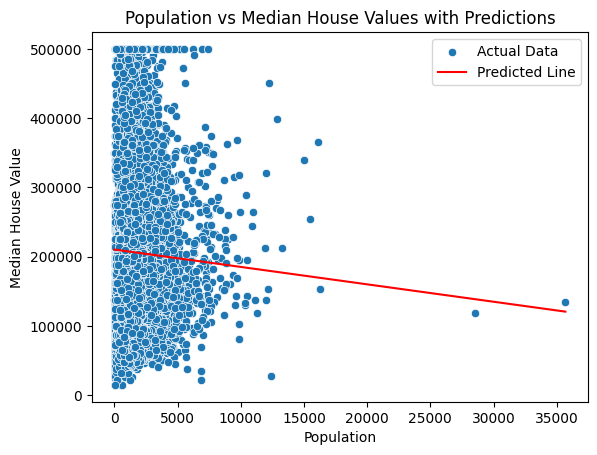

In [17]:
population_price_graph_df = pd.DataFrame({"Population": df['population'], "Actual Price": df['median_house_value'], "Predicted Price": population_v_price_predicted})
sns.scatterplot(x='Population', y='Actual Price', data=population_price_graph_df, label='Actual Data')
sns.lineplot(x='Population', y='Predicted Price', data=population_price_graph_df, color='red', label='Predicted Line')

plt.xlabel('Population')
plt.ylabel('Median House Value')
plt.title('Population vs Median House Values with Predictions')

plt.legend()
plt.show()

### Graph for Actual and Predicted values for Median House Price given Households

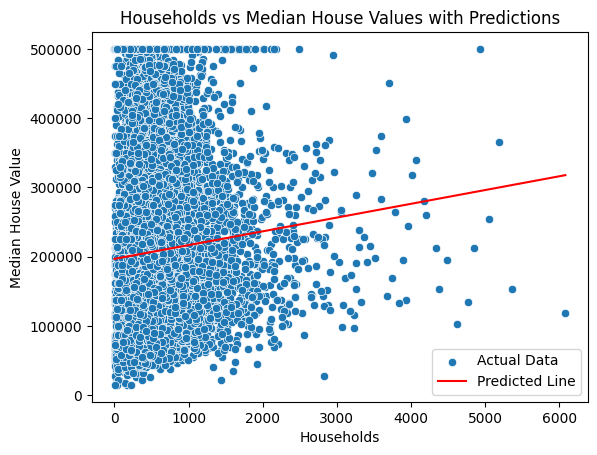

In [18]:
households_price_graph_df = pd.DataFrame({"Households": df['households'], "Actual Price": df['median_house_value'], "Predicted Price": household_v_price_predicted})
sns.scatterplot(x='Households', y='Actual Price', data=households_price_graph_df, label='Actual Data')
sns.lineplot(x='Households', y='Predicted Price', data=households_price_graph_df, color='red', label='Predicted Line')

plt.xlabel('Households')
plt.ylabel('Median House Value')
plt.title('Households vs Median House Values with Predictions')

plt.legend()
plt.show()

### Summary Table

This table will show summary of model performance given 3 different features

In [19]:
# This function will show values for the large values like Mean squared error as float values without exponents
pd.set_option('display.float_format', lambda x: '%.4f' % x)
summary_table

,Model,Dependent Variable,Independent Variable,Intercept,Coefficient,R2 Score,Mean Absolute Error,Mean Squared Error
0,income_v_price_model,median_income,median_house_value,45085.5767,[41793.849201896286],0.4734,62625.9338,7011311502.9295
1,population_v_price_model,population,median_house_value,210436.2621,[-2.511752774615085],0.0006,91153.8201,13307412412.3894
2,household_v_price_model,households,median_house_value,196928.5772,[19.872775155643875],0.0043,90802.7432,13257776904.7285


### Conslusion

The above table shows that the income_v_price_model seems moderate with an an R2 score of 47%. However, the population_v_price_model and household_v_price_model perform poorly, with very low R2 scores of 0.0006 and 0.0043, respectively. High errors in predicting prices suggest these models may benefit from reconsidering the chosen features or model structure to enhance accuracy and overall performance.